# <center> Montreal Crime Data </center>

Ref : https://www.kaggle.com/stevieknox/montreal-crime-data

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
import matplotlib.lines as lines
from wordcloud import WordCloud

In [2]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'


In [3]:
# Load input file
df_input = pd.read_csv('Montreal Crime Data.csv')

In [4]:
print (f"Shape of dataframe : {df_input.shape}\n")
print (f"Sample data frame:\n")
display(df_input.head())
print ("Dataset summary \n")
display (df_input.info())

Shape of dataframe : (136642, 10)

Sample data frame:



,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


Dataset summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     136642 non-null  int64  
 1   category       136642 non-null  object 
 2   date           136642 non-null  object 
 3   postal_code    136642 non-null  object 
 4   city           136642 non-null  object 
 5   neighbourhood  136642 non-null  object 
 6   year           136642 non-null  int64  
 7   count          136642 non-null  int64  
 8   longitude      136642 non-null  float64
 9   latitude       136642 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 10.4+ MB


None

In [5]:
df_input.columns

Index(['Unnamed: 0', 'category', 'date', 'postal_code', 'city',
       'neighbourhood', 'year', 'count', 'longitude', 'latitude'],
      dtype='object')

In [6]:
# Feature 'Unnanmed' is just a series of number. Doesn't add any model values to dataset. Hence removing this feature from dataset.
df_input.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Unique values in the feature 'count'
df_input['count'].unique()

array([1], dtype=int64)

In [8]:
# Since feature 'count' contains only one value, not much significance in data analysis. Hence removing this feature.
df_input.drop('count', axis=1, inplace=True)

In [9]:
# Removing features lattitude and longitude
df_input.drop(['longitude', 'latitude'], axis=1,inplace=True)

In [10]:
# After removing the non necessary columns
df_input.columns

Index(['category', 'date', 'postal_code', 'city', 'neighbourhood', 'year'], dtype='object')

## Feature Analysis

In [11]:
#Categorical feature analysis
def analyze_categorical_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()
    


In [12]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Sample data:\n",fld.head())
    print ("\nNull value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    print (f"\n Skewness : {fld.skew()} \n")
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(fld.name + "-distribution")
    plt.show()
    plt.close()
    

### 1. Category

Sample data:



0    Motor vehicle theft
1    Motor vehicle theft
2          Home Invasion
3               Mischief
4               Mischief
Name: category, dtype: object


Null value count :  0

Unique values:  ['Motor vehicle theft', 'Home Invasion', 'Mischief', 'Theft in / from a motor vehicle', 'Confirmed Theft', 'Offenses resulting in death']

 Unique values count:  6

Value counts:
                              Value  Count
0                    Home Invasion  43354
1  Theft in / from a motor vehicle  35382
2                         Mischief  31385
3              Motor vehicle theft  18723
4                  Confirmed Theft   7676
5      Offenses resulting in death    122


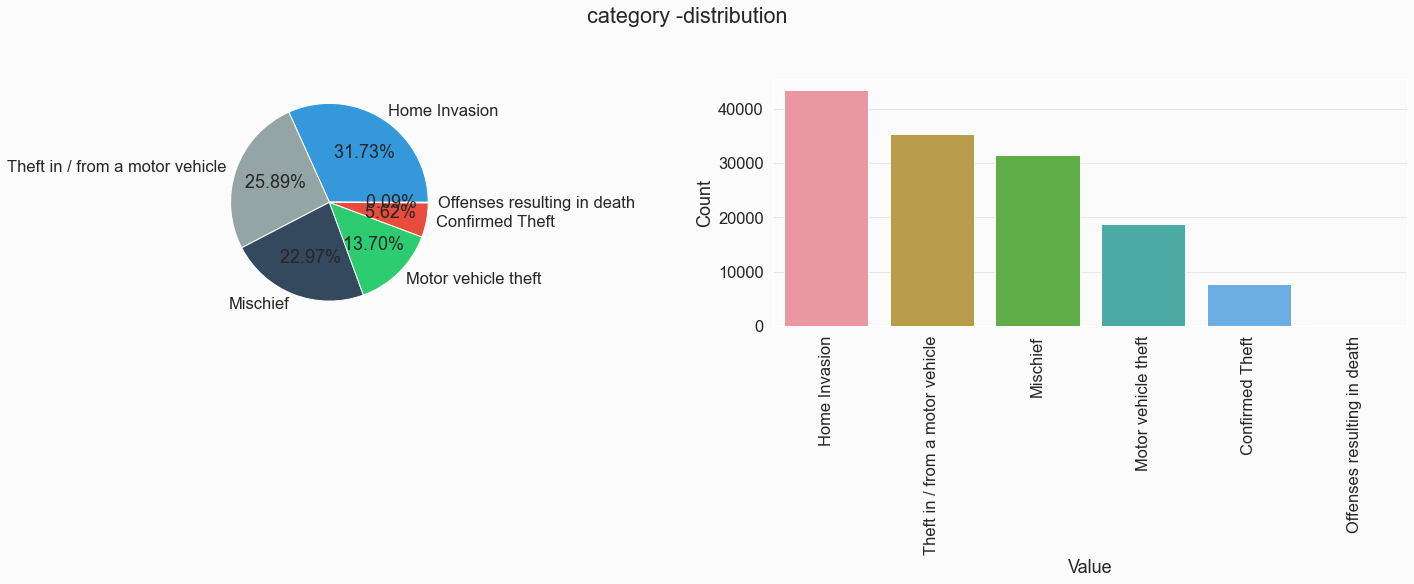

In [13]:
analyze_categorical_feature(df_input.category)

### 2. Date, Year

Sample data:



0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64


Null value count :  0

Unique values:  [2018, 2017, 2015, 2016, 2019, 2020, 2021]

 Unique values count:  7

Value counts:
    Value  Count
0   2015  24222
1   2016  23407
2   2017  22611
3   2018  19419
4   2019  18650
5   2020  17786
6   2021  10547


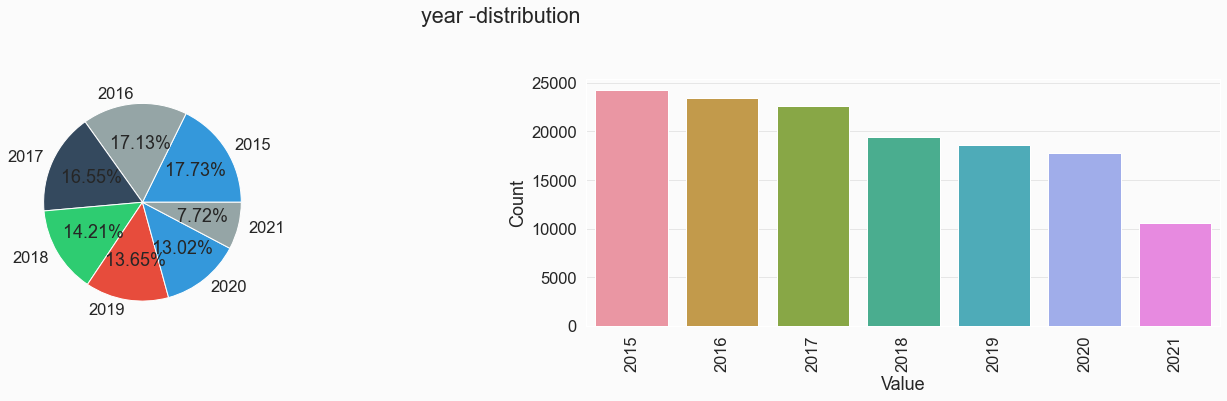

In [14]:
# Since and date and year features are related, we can take year feature to analyse the distribution of records.
analyze_categorical_feature(df_input.year)

Dataset contains data from year 2015 to 2021 <br>
We can see that from 2015 to 2021, number of crime rates were reduced.<br>

### 3. Postal code

In [15]:
# Unique values in Postal code
df_input.postal_code.unique()

array(['H1Z 1S9', 'H1Z 2V6', 'H1Z 3Z8', ..., 'H4Y 1E2', 'H4Y 1J6',
       'H4Y 1G3'], dtype=object)

In [16]:
# number of unique values in postal code
df_input.postal_code.nunique()

10831

### 4. City

Sample data:



0    MONTREAL
1    MONTREAL
2    MONTREAL
3    MONTREAL
4    MONTREAL
Name: city, dtype: object


Null value count :  0

Unique values:  ['MONTREAL', 'SAINT-LAURENT', 'OUTREMONT', 'MONT-ROYAL', 'MONTREAL-NORD', 'DORVAL', 'POINTE-CLAIRE', 'MONTREAL-EST', 'SAINT-LEONARD', 'COTE SAINT-LUC', 'VERDUN', 'ANJOU', 'PIERREFONDS', 'DOLLARD-DES-ORMEAUX', 'WESTMOUNT', 'LACHINE', "L'ILE-BIZARD", 'HAMPSTEAD', 'ROXBORO', 'POINTE-AUX-TREMBLES', 'LASALLE', 'SAINTE-GENEVIEVE', 'KIRKLAND', 'MONTREAL-OUEST', 'BEACONSFIELD', 'SAINTE-ANNE-DE-BELLEVUE', "BAIE-D'URFE", 'SENNEVILLE']

 Unique values count:  28

Value counts:
                       Value  Count
0                  MONTREAL  92665
1             MONTREAL-NORD   6879
2             SAINT-LEONARD   4781
3             SAINT-LAURENT   4572
4                    VERDUN   3902
5                     ANJOU   3016
6                   LACHINE   3006
7                   LASALLE   2850
8       POINTE-AUX-TREMBLES   2445
9               PIERREFONDS   1555
10                WESTMOUNT   1440
11                OUTREMONT   1423
12      DOLLARD-DES-ORMEAUX   137

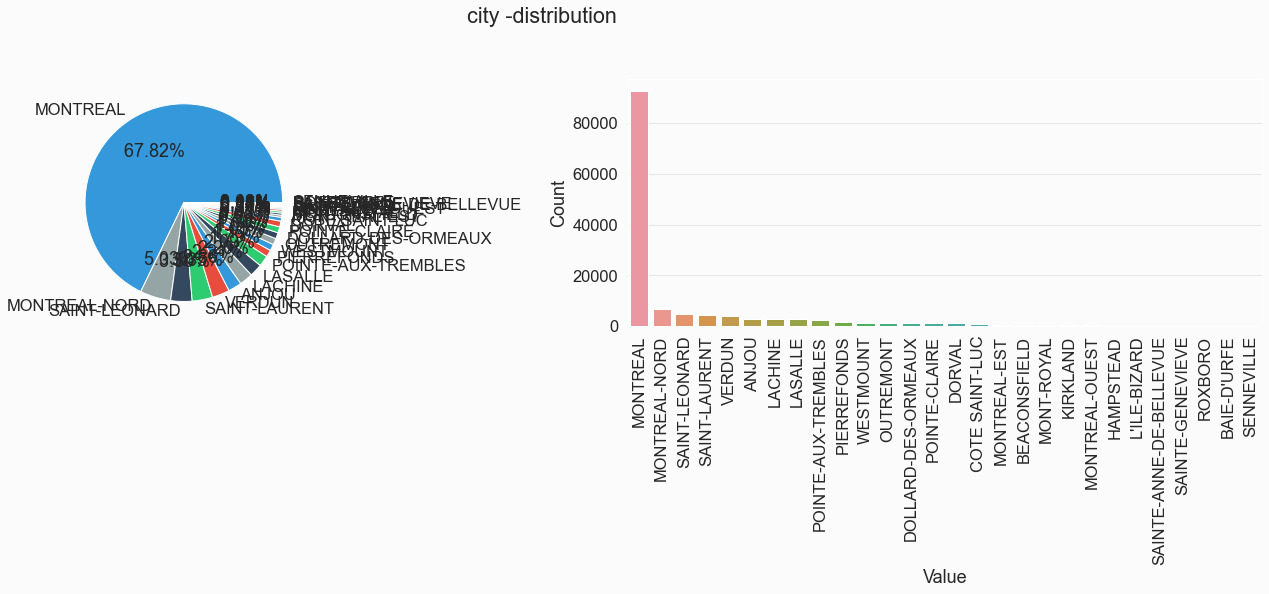

In [17]:
analyze_categorical_feature(df_input.city)

<p>
There are 28 different city's record is available in the dataset. <br>
67.82% records are from Montreal city.
    </p>

### 5. Neighbourhood

Sample data:



0    Saint-Michel
1    Saint-Michel
2    Saint-Michel
3    Saint-Michel
4    Saint-Michel
Name: neighbourhood, dtype: object


Null value count :  0

Unique values:  ['Saint-Michel', 'Saint-Laurent', 'Outremont', 'Montréal-Nord', "Dorval / L'Île-Dorval", 'Centre-Sud', 'Mercier', 'Petite-Patrie', 'Old Montreal', 'Villeray', 'Rosemont', 'Ahuntsic', 'Parc-Extension', 'Cartierville', 'Côte Saint-Luc', 'Pointe-Claire', 'Verdun', 'Hochelaga', 'Saint-Léonard', 'Plateau Mont-Royal', 'Anjou', 'Dollard-des-Ormeaux', 'Notre-Dame-de-Grâce', 'Maisonneuve', 'Westmount', 'Rivière-des-Prairies', 'Lachine', 'Griffintown(Includes Île Notre-Dame & Île Sainte-Hélène)(Université de Montréal)', 'Saint-Michel,East', 'Ville Émard', "L'Île-Bizard", 'Downtown Montreal', 'Saint-Henri', 'Hampstead / Côte Saint-Luc', 'Pointe-Saint-Charles', 'Pierrefonds-Roxboro', 'Montreal East', 'Pierrefonds', 'Lasalle', 'Pointe-aux-Trembles', 'Dorval', 'Sainte-Geneviève / Pierrefonds', 'Côte-des-Neiges', "L'Île-Des-Soeurs", 'Kirkland', 'Montreal West', 'Mount Royal', 'Petite-Bourgogne', 'Senneville', 'Beaconsfield', 'Sainte-Anne-De-Bellevue']

 Unique 

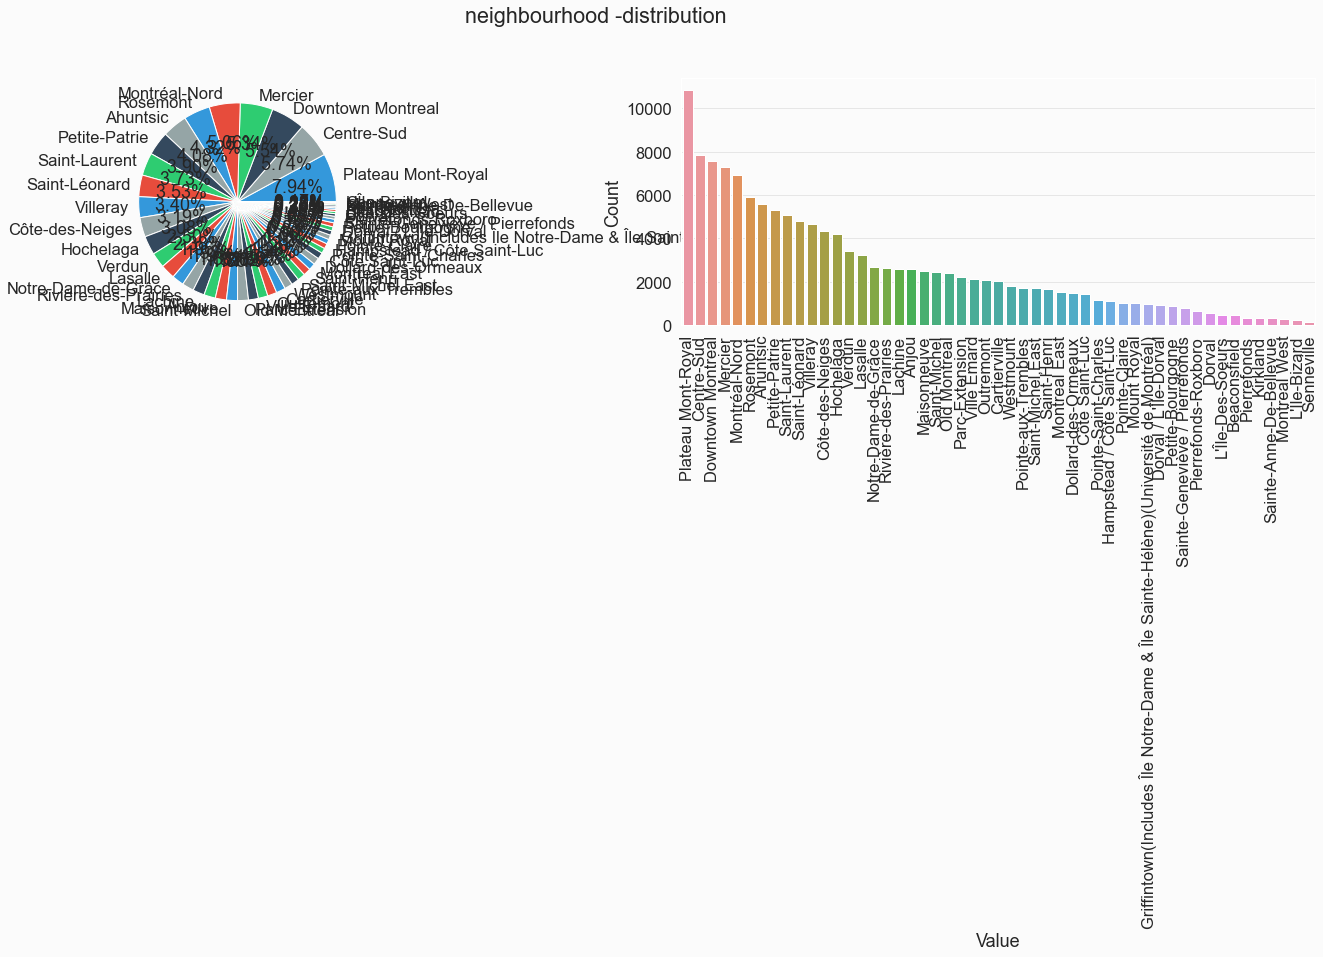

In [18]:
analyze_categorical_feature(df_input.neighbourhood)

## Feature Relationships

### 1. Cities having theft in common.

In [19]:
df_cities = df_input.loc[:,['category', 'city']].copy()

In [20]:
# Filtering categories based on theft
df_cities=df_cities[(df_cities['category'] == 'Motor vehicle theft') | (df_cities['category']=='Theft in / from a motor vehicle') | (df_cities['category']=='Confirmed Theft')]

In [21]:
cities = df_cities.city
cities=cities.value_counts()

In [22]:
cities_counts={}

In [23]:
for item in cities.iteritems():
    cities_counts[item[0]]=item[1]

In [24]:
# Cities based on theft crime count
cities_counts

{'MONTREAL': 40376,
 'MONTREAL-NORD': 3412,
 'SAINT-LEONARD': 2805,
 'SAINT-LAURENT': 2488,
 'ANJOU': 1870,
 'VERDUN': 1494,
 'LASALLE': 1298,
 'LACHINE': 1244,
 'POINTE-AUX-TREMBLES': 1215,
 'DORVAL': 705,
 'DOLLARD-DES-ORMEAUX': 698,
 'PIERREFONDS': 664,
 'POINTE-CLAIRE': 653,
 'OUTREMONT': 596,
 'WESTMOUNT': 491,
 'COTE SAINT-LUC': 361,
 'MONT-ROYAL': 247,
 'MONTREAL-EST': 221,
 'KIRKLAND': 173,
 'BEACONSFIELD': 169,
 'MONTREAL-OUEST': 134,
 'HAMPSTEAD': 124,
 'SAINTE-ANNE-DE-BELLEVUE': 96,
 "L'ILE-BIZARD": 80,
 'ROXBORO': 67,
 'SAINTE-GENEVIEVE': 51,
 "BAIE-D'URFE": 47,
 'SENNEVILLE': 2}

In [25]:
wc=WordCloud(background_color=background_color).generate_from_frequencies(cities_counts)

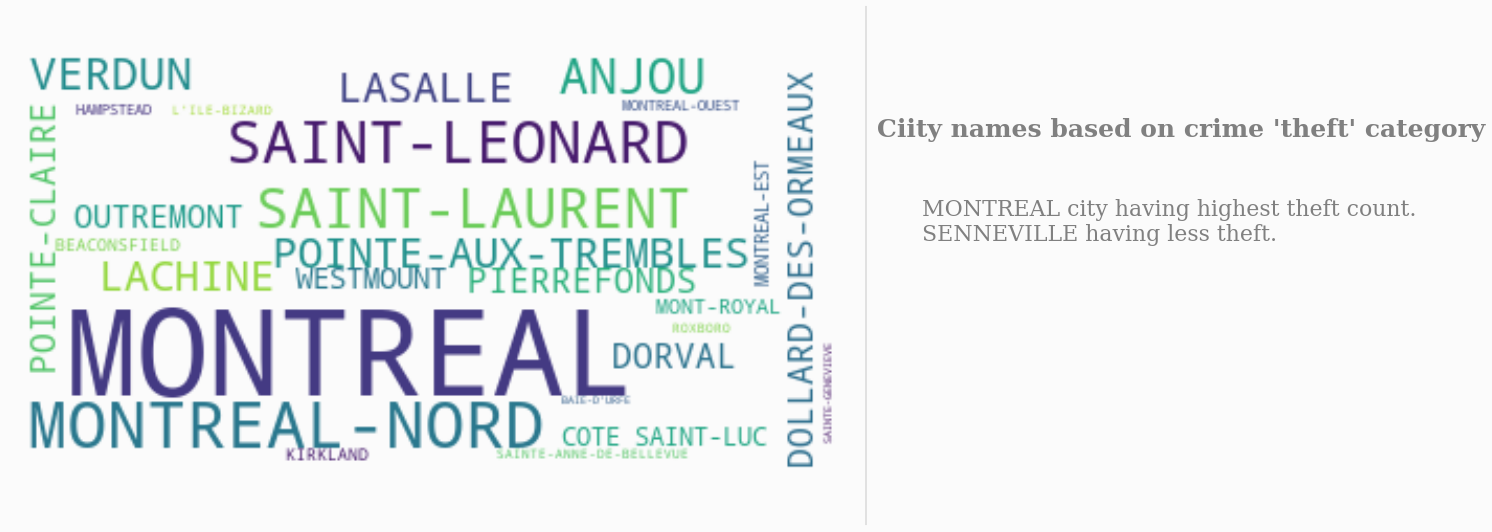

In [26]:
fig=plt.figure(figsize=(15,9),facecolor=background_color)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="Ciity names based on crime 'theft' category",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        MONTREAL city having highest theft count.
        SENNEVILLE having less theft.
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()


### 2. Cities having 'Offences resulting in death'

In [27]:
df_cities = df_input.loc[:,['category', 'city']].copy()

In [28]:
df_cities=df_cities[df_cities['category'] == 'Offenses resulting in death']

In [29]:
cities = df_cities.city
city_counts={}
cities = cities.value_counts()

In [30]:
for item in cities.iteritems():
    city_counts[item[0]] = item[1]

In [31]:
# City names based on count
city_counts

{'MONTREAL': 79,
 'MONTREAL-NORD': 9,
 'LASALLE': 6,
 'POINTE-AUX-TREMBLES': 5,
 'ANJOU': 4,
 'LACHINE': 4,
 'SAINT-LEONARD': 4,
 'COTE SAINT-LUC': 2,
 'PIERREFONDS': 2,
 'VERDUN': 2,
 'ROXBORO': 1,
 'MONTREAL-OUEST': 1,
 "L'ILE-BIZARD": 1,
 'SAINT-LAURENT': 1,
 'DOLLARD-DES-ORMEAUX': 1}

In [32]:
# Word cloud preparation
wc=WordCloud(background_color=background_color).generate_from_frequencies(cities_counts)

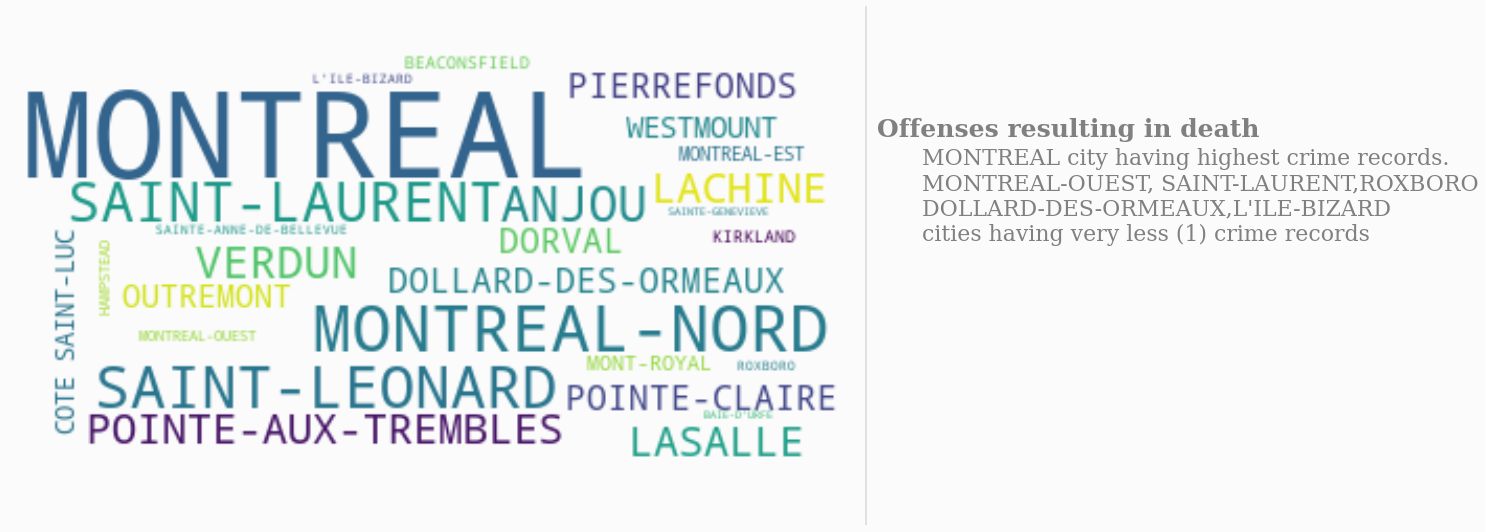

In [33]:
# Word cloud visualization
fig=plt.figure(figsize=(15,9),facecolor=background_color)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)
ax0.imshow(wc,interpolation='bilinear')
ax0.axis('off')
#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="Offenses resulting in death",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        MONTREAL city having highest crime records.
        MONTREAL-OUEST, SAINT-LAURENT,ROXBORO
        DOLLARD-DES-ORMEAUX,L'ILE-BIZARD
        cities having very less (1) crime records
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()


### 3. Top 3 crime categories per year

In [34]:
df_data = df_input.loc [:,['year', 'city', 'category']].copy()

In [35]:
group=df_data.groupby(['year', 'category']).aggregate('count')

In [36]:
df_summary=group.reset_index()

In [37]:
df_summary.rename({'city':'count'}, axis=1,inplace=True)

In [38]:
df_summary

,year,category,count
0,2015,Confirmed Theft,1354
1,2015,Home Invasion,8201
2,2015,Mischief,5849
3,2015,Motor vehicle theft,2669
4,2015,Offenses resulting in death,20
5,2015,Theft in / from a motor vehicle,6129
6,2016,Confirmed Theft,1285
7,2016,Home Invasion,8309
8,2016,Mischief,5141
9,2016,Motor vehicle theft,2588


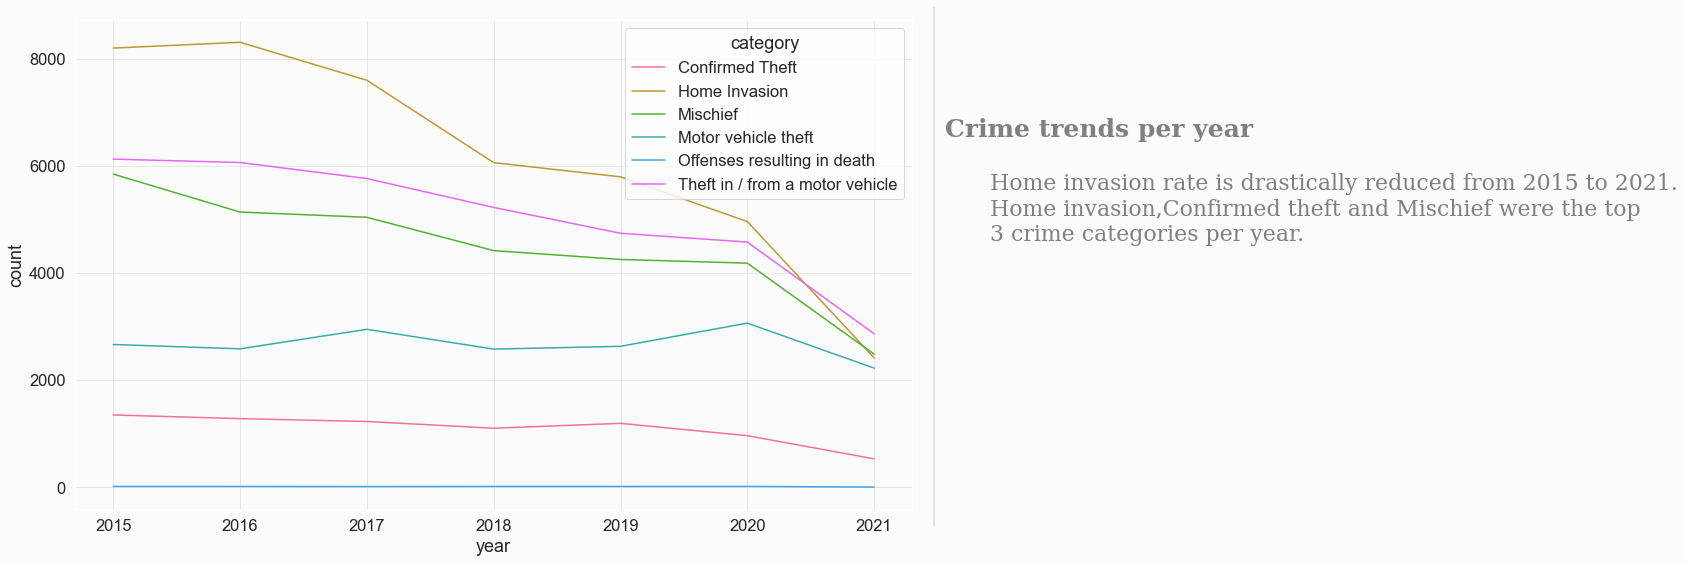

In [39]:
# Word cloud visualization
fig=plt.figure(figsize=(15,9),facecolor=background_color)
gs= fig.add_gridspec(1,1)
gs.update(wspace=0.5, hspace=0.5)
ax0=fig.add_subplot(gs[0,0])
ax0.set_facecolor(background_color)

sns.lineplot(data=df_summary, x = 'year', y='count',hue='category', ax=ax0)

#Draw a seperation line
l1=lines.Line2D([0.92,0.92],[0.1,0.9], transform=fig.transFigure,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(x=0.93,y=0.7,
         s="Crime trends per year",
         fontsize=25,fontfamily='serif',color='grey',fontweight='bold')
fig.text(x=0.92,
        y=0.5,
        fontweight='light',
        fontfamily='serif',
        fontsize=22,
        color='grey',
        s='''
        Home invasion rate is drastically reduced from 2015 to 2021.
        Home invasion,Confirmed theft and Mischief were the top
        3 crime categories per year.        
        ''')
fig.tight_layout(pad=0)
fig.patch.set_facecolor(background_color)
plt.show()


### 4. Top 10 cities with more crime records

In [45]:
top_cities=pd.DataFrame(df_input['city'].value_counts())

In [48]:
top_cities.rename({'city':'CrimeCount'},axis=1,inplace=True)

In [52]:
top_cities.rename_axis('City',axis=0,inplace=True)

In [58]:
top_cities.head(10).style.bar()

,CrimeCount
City,
MONTREAL,92665
MONTREAL-NORD,6879
SAINT-LEONARD,4781
SAINT-LAURENT,4572
VERDUN,3902
ANJOU,3016
LACHINE,3006
LASALLE,2850
POINTE-AUX-TREMBLES,2445
